# Analyse license choices for bioRxiv preprints

In [1]:
import json

import pandas
import altair

In [2]:
# Ordered according to https://creativecommons.org/licenses/
licenses = ['CC BY', 'CC BY-ND', 'CC BY-NC', 'CC BY-NC-ND', 'None']
license_colors = ['#F68212', '#AC5B0C', '#934E0A', '#492705', '#000000']

## Read data

In [3]:
df = pandas.read_table('data/biorxiv-prepubmed.tsv', parse_dates=['Date'])
df.License = df.License.fillna('None')
df.License = pandas.Categorical(df.License, licenses)
df.head(2)

,DOI,Date,Subjects,License
0,10.1101/000026,2014-09-08,Genetics,CC BY
1,10.1101/000042,2013-12-01,Genomics,CC BY


## Frequency by license type

In [4]:
df.License.value_counts(normalize=True)

CC BY-NC-ND    0.368123
None           0.297721
CC BY          0.178255
CC BY-NC       0.084337
CC BY-ND       0.071563
Name: License, dtype: float64

## License distribution over time

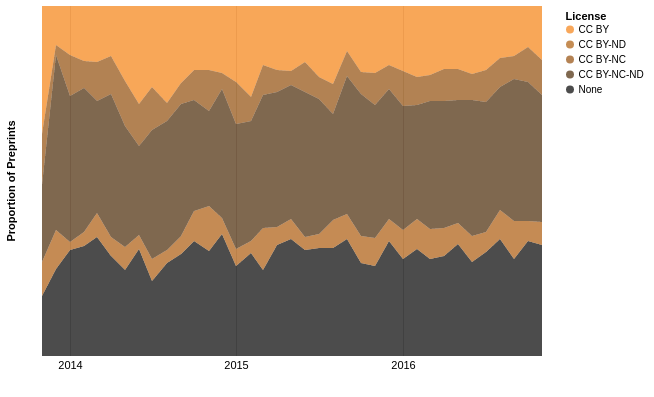

In [5]:
x_axis = altair.Axis(
    axisWidth=0.0,
    format='%Y',
    labelAngle=0.0,
    tickSize=0.0,
)

y_axis = altair.Axis(grid=False, ticks=0, labels=False, axisWidth=0)

x_scale = altair.Scale(nice='month')
color_scale = altair.Scale(domain=licenses, type='ordinal', range=license_colors)

chart = altair.Chart(data=df)
chart = chart.mark_area(stacked='normalize')
chart.encode(
    x = altair.X('Date:T', timeUnit='yearmonth', axis=x_axis, title=' ', scale=x_scale),
    y = altair.Y('count(*):Q', axis=y_axis, title='Proportion of Preprints'),
    color = altair.Color('License:N', scale=color_scale),
)

In [6]:
# Export chart data
data = chart.to_dict()['data']['values']
with open('figure/license-vs-time/vega-lite-data.json', 'w') as write_file:
    json.dump(data, write_file, ensure_ascii=False, indent=2, sort_keys=True)

# Export chart
with open('figure/license-vs-time/vega-lite-altair.json', 'w') as write_file:
    config = chart.to_json(indent=2, data=False, ensure_ascii=True)
    write_file.write(config)